- Analyze the most relevant numeric and categorical variables that can affect and predict “SalePrice”. 
- Perform statistical exploration and visualization to analyze their relationship with “SalePrice”.



# Qn 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
original_df = pd.read_csv("train.csv")
original_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
original_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Finding outliers in **box plots** for LotArea, GrLiveArea, TotalBsmtSF, GarageArea

In [5]:
numeric_cols = ['LotArea', 'GrLivArea', "TotalBsmtSF", "GarageArea"]
numeric_data = pd.DataFrame(original_df.loc[:, [*numeric_cols, "SalePrice"]])

numeric_data.describe().round(2)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1515.46,1057.43,472.98,180921.2
std,9981.26,525.48,438.71,213.80,79442.5
min,1300.00,334.00,0.00,0.00,34900.0
25%,7553.50,1129.50,795.75,334.50,129975.0
50%,9478.50,1464.00,991.50,480.00,163000.0
75%,11601.50,1776.75,1298.25,576.00,214000.0
max,215245.00,5642.00,6110.00,1418.00,755000.0


In [6]:
has_na = numeric_data.isna().any()
has_na

LotArea        False
GrLivArea      False
TotalBsmtSF    False
GarageArea     False
SalePrice      False
dtype: bool

<Axes: xlabel='GarageArea'>

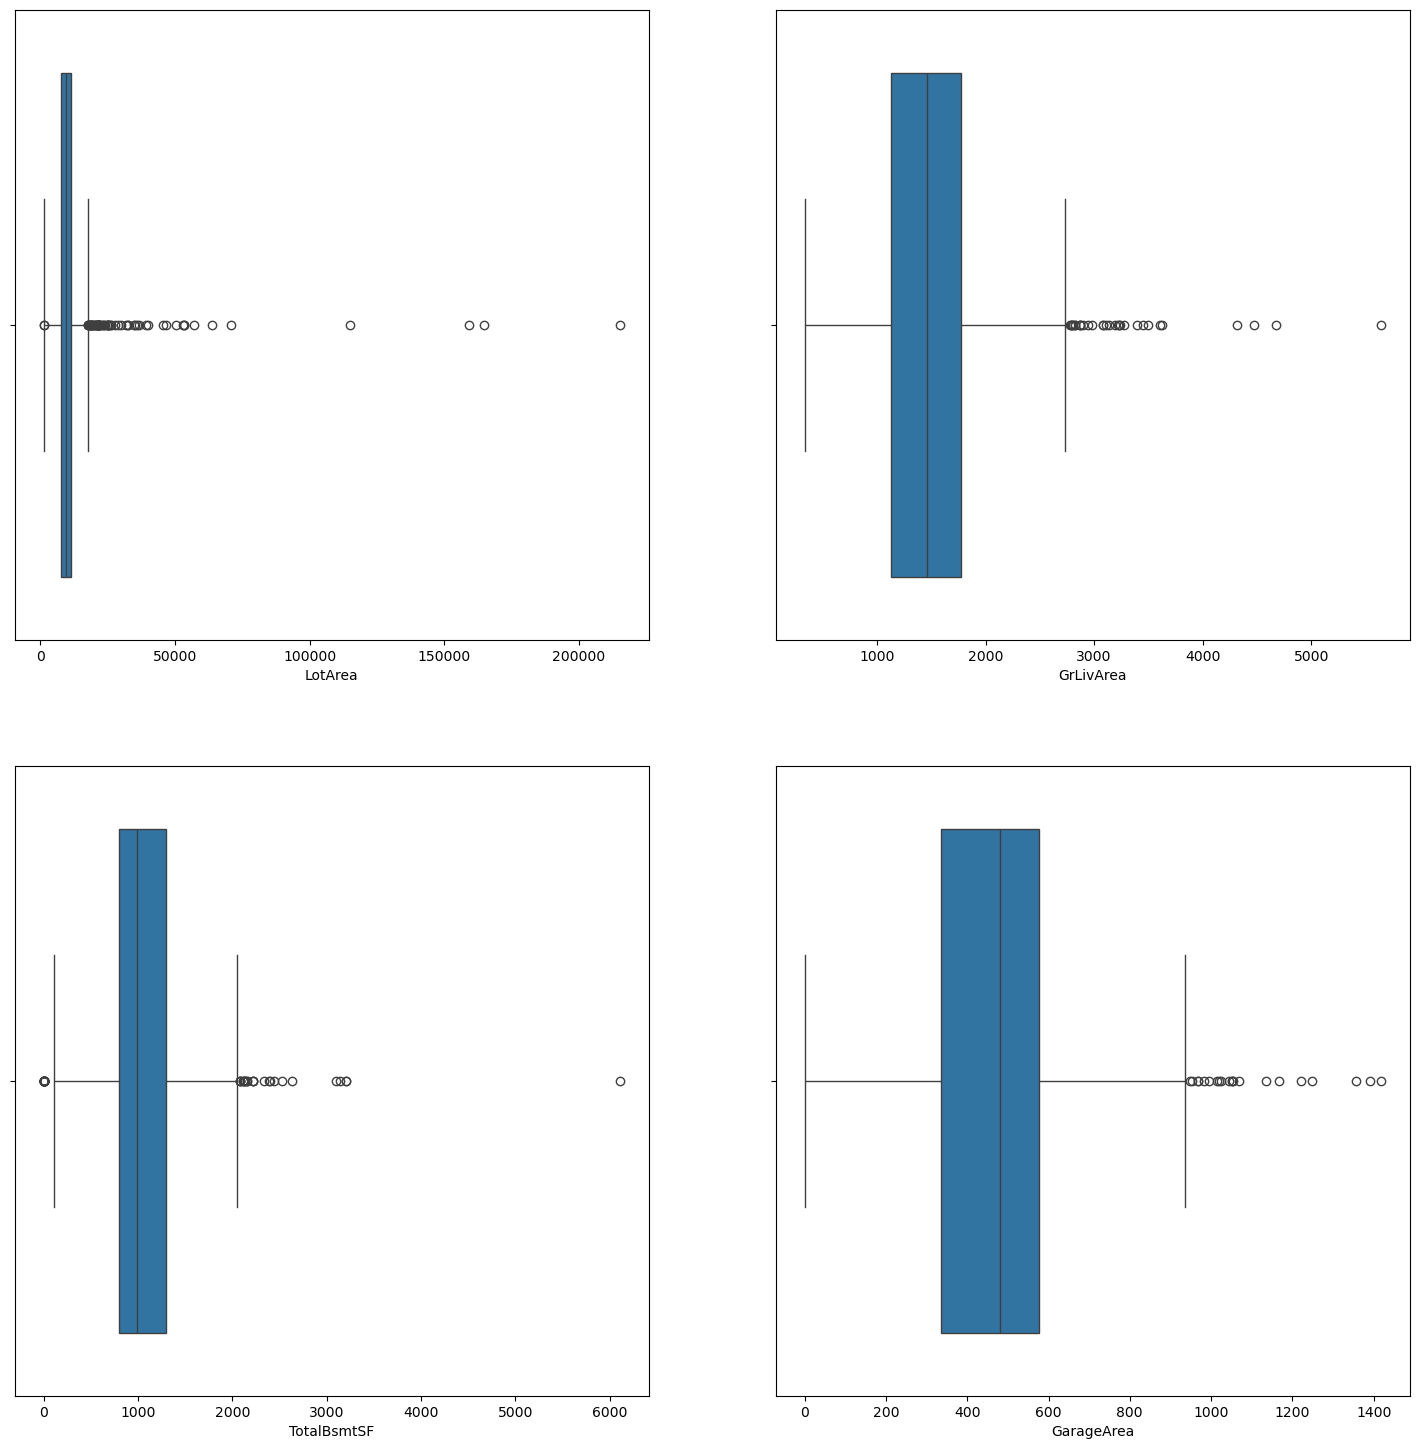

In [7]:
f, axes = plt.subplots(2, 2, figsize=(18, 18))

sns.boxplot(data = numeric_data['LotArea'], orient = "h", ax = axes[0, 0])
sns.boxplot(data = numeric_data['GrLivArea'], orient = "h", ax = axes[0, 1])
sns.boxplot(data = numeric_data['TotalBsmtSF'], orient = "h", ax = axes[1, 0])
sns.boxplot(data = numeric_data['GarageArea'], orient = "h", ax = axes[1, 1])

In [8]:
def get_outlier_count(colNames):
    for colName in colNames:
        Q1 = numeric_data[colName].quantile(0.25)
        Q3 = numeric_data[colName].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = numeric_data[(numeric_data[colName] < lower_bound) | (numeric_data[colName] > upper_bound)]
        number_of_outliers = outliers.shape[0]

        print(f"Number of outliers in {colName}:", number_of_outliers)

get_outlier_count(numeric_cols)

Number of outliers in LotArea: 69
Number of outliers in GrLivArea: 31
Number of outliers in TotalBsmtSF: 61
Number of outliers in GarageArea: 21


<font color="red">1a) LotArea has the most outliers at 69<font color="red">

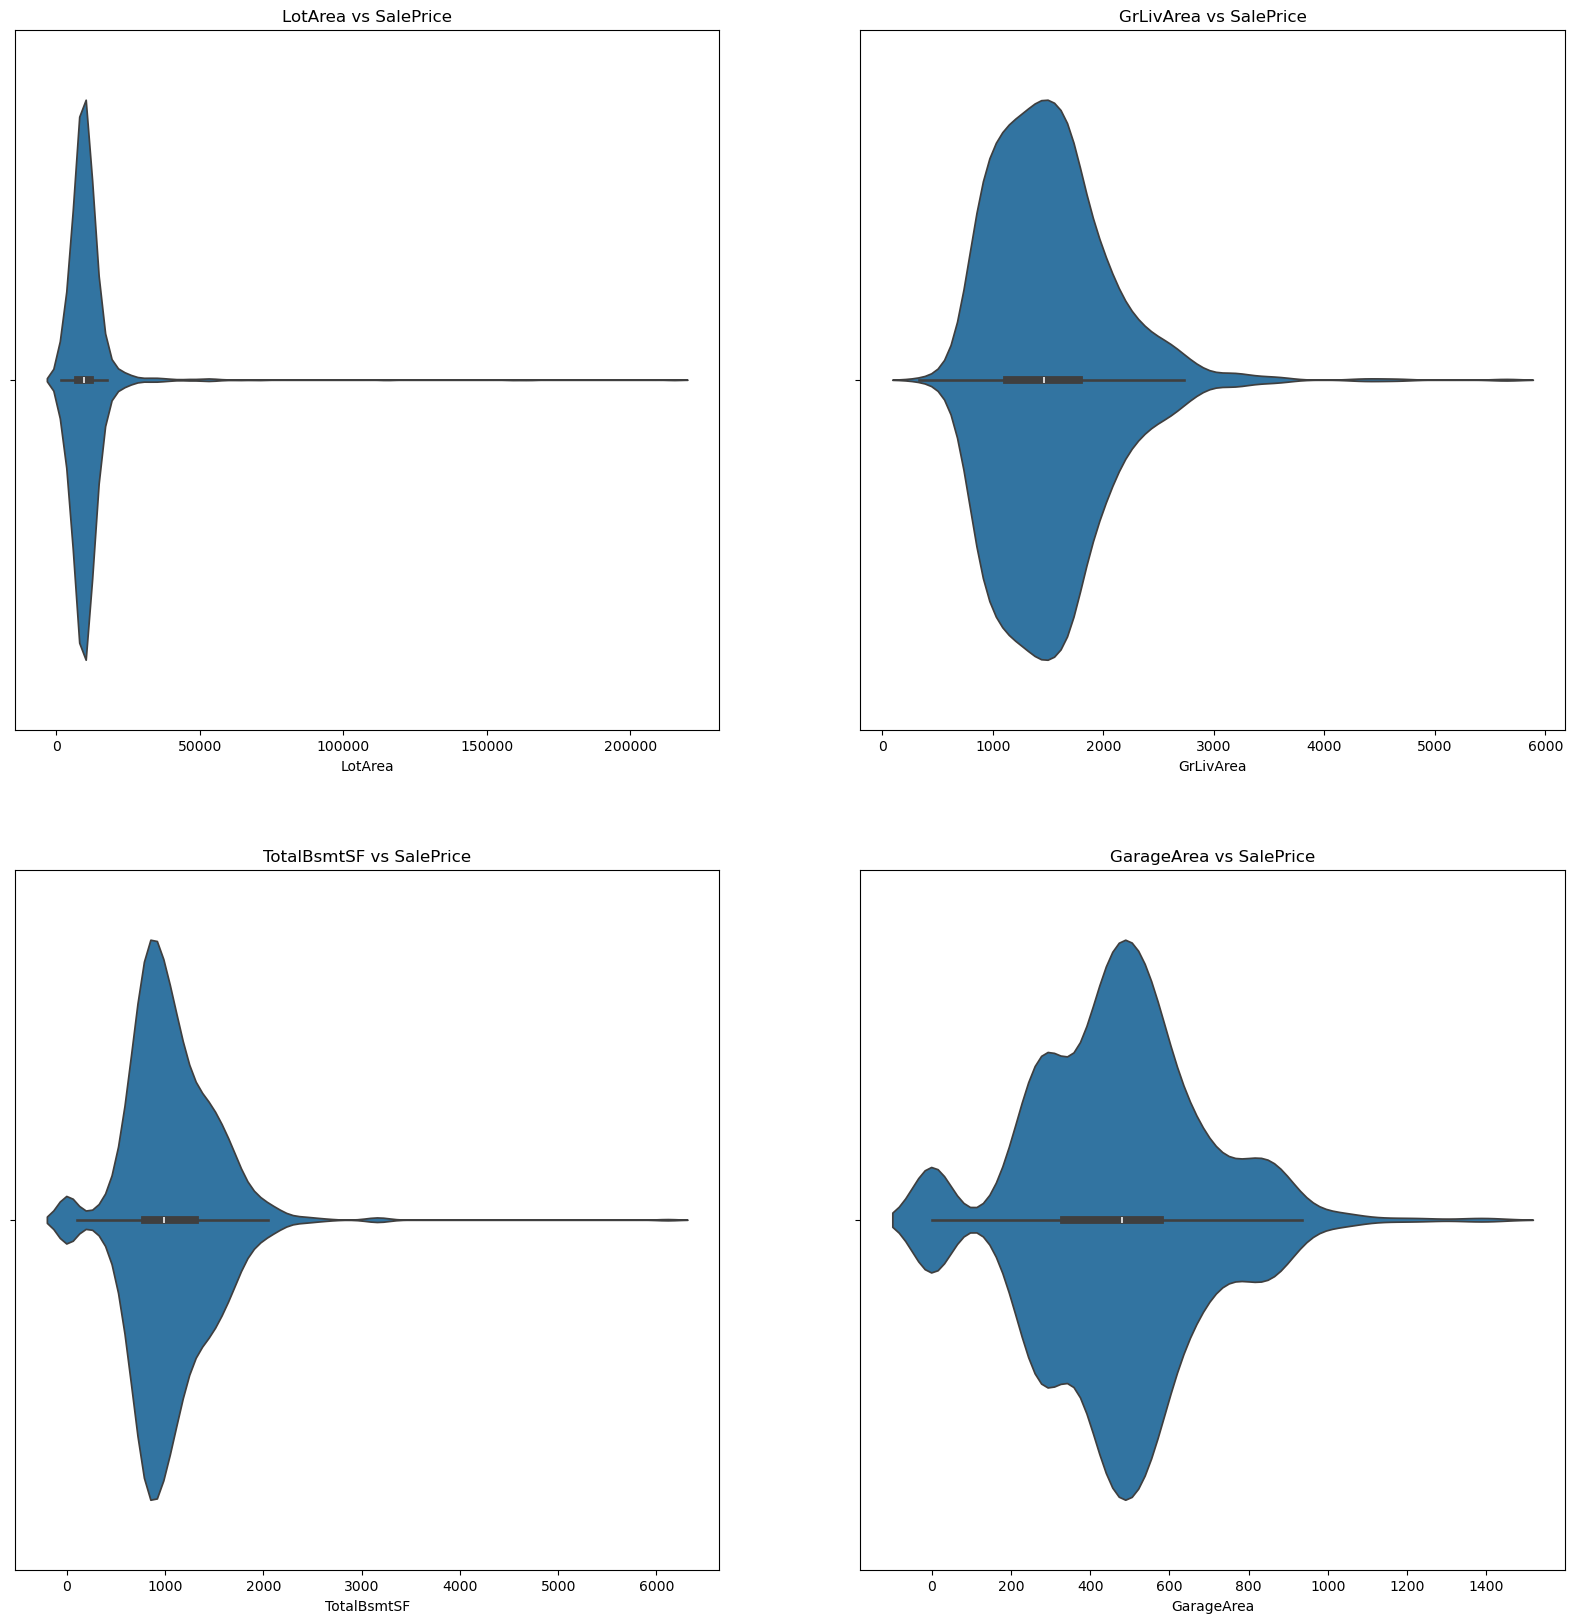

In [9]:
plt.figure(figsize=(20, 20))

# Iterate over numeric_cols and plot boxplots
for i, col_name in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data = numeric_data[col_name], orient="h")
    plt.title(f"{col_name} vs SalePrice")

# Show plot
plt.show()

In [10]:
for col_name in numeric_cols:
    print(f"Skew value of {col_name} is {numeric_data[col_name].skew()}")

Skew value of LotArea is 12.207687851233496
Skew value of GrLivArea is 1.3665603560164552
Skew value of TotalBsmtSF is 1.5242545490627664
Skew value of GarageArea is 0.17998090674623907


<font color="red">1b) LotArea is the most skewed from a regular normal distriqbution. It has a positive skew</font>

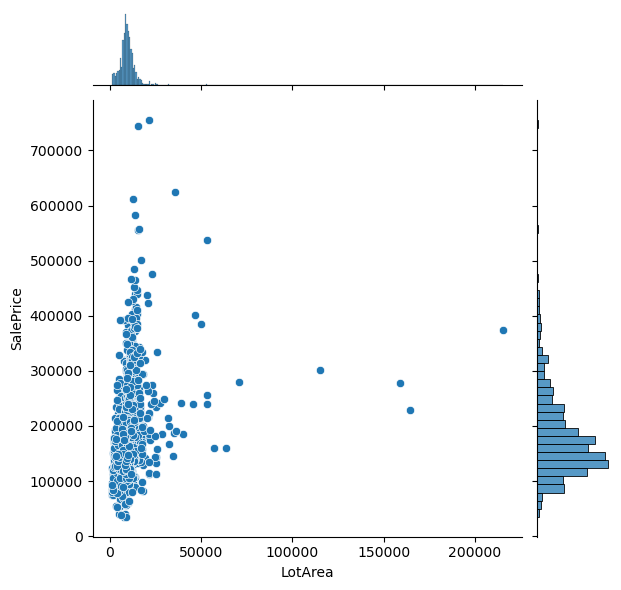

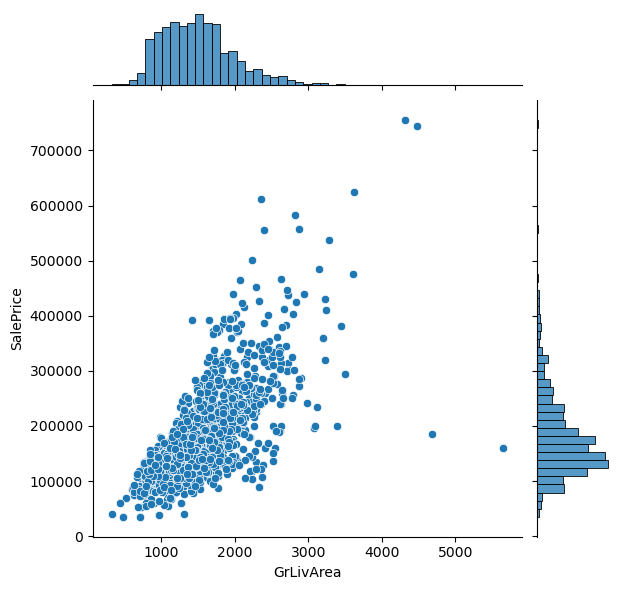

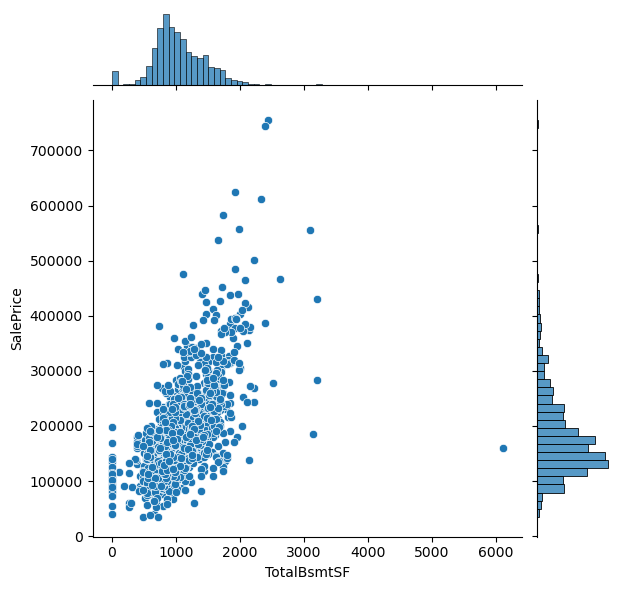

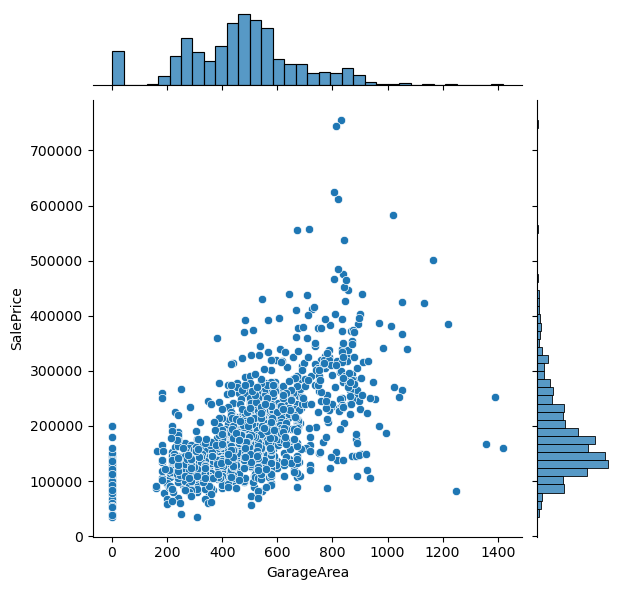

In [11]:
for col_name in numeric_cols:
    sns.jointplot(x = numeric_data[col_name], y = numeric_data["SalePrice"])

In [12]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [13]:
for col_name in numeric_cols:
    print(f"Correlation between {col_name} and SalePrice: ", numeric_data["SalePrice"].corr(numeric_data[col_name]))

Correlation between LotArea and SalePrice:  0.2638433538714057
Correlation between GrLivArea and SalePrice:  0.7086244776126523
Correlation between TotalBsmtSF and SalePrice:  0.6135805515591956
Correlation between GarageArea and SalePrice:  0.6234314389183618


<font color="red">1c) The top 2 variables will be GrLivArea and GarageArea since they are they have the strongest linear relationship with SalePrice</font>

These 2 variables have the strongest and linear relationship with SalePrice, making it a potentially very relevant predictor for SalePrice. This relationship happens to be positive. 

# Qn 2

### Analysing Categorical Variables

In [14]:
categorical_cols = ["MSSubClass", "Neighborhood", "BldgType", "OverallQual"]
categorical_data = pd.DataFrame(original_df.loc[:, [*categorical_cols, "SalePrice"]])
categorical_data

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
...,...,...,...,...,...
1455,60,Gilbert,1Fam,6,175000
1456,20,NWAmes,1Fam,6,210000
1457,70,Crawfor,1Fam,7,266500
1458,20,NAmes,1Fam,5,142125


In [15]:
for colName in categorical_cols:
    print(f"{colName} has {categorical_data[colName].nunique()} unique levels")

MSSubClass has 15 unique levels
Neighborhood has 25 unique levels
BldgType has 5 unique levels
OverallQual has 10 unique levels


In [16]:
for colName in categorical_cols:
    highest_house_level = categorical_data[colName].value_counts().idxmax()
    highest_house_count = categorical_data[colName].value_counts().max()
    print(f"Level for column {colName} with most houses: {highest_house_level} ({highest_house_count})")

Level for column MSSubClass with most houses: 20 (536)
Level for column Neighborhood with most houses: NAmes (225)
Level for column BldgType with most houses: 1Fam (1220)
Level for column OverallQual with most houses: 5 (397)


<font color="red">2a) Neighbourhood has the highest number of levels (25). The "1Fam" level of "BldgType" has the highest house count</font>

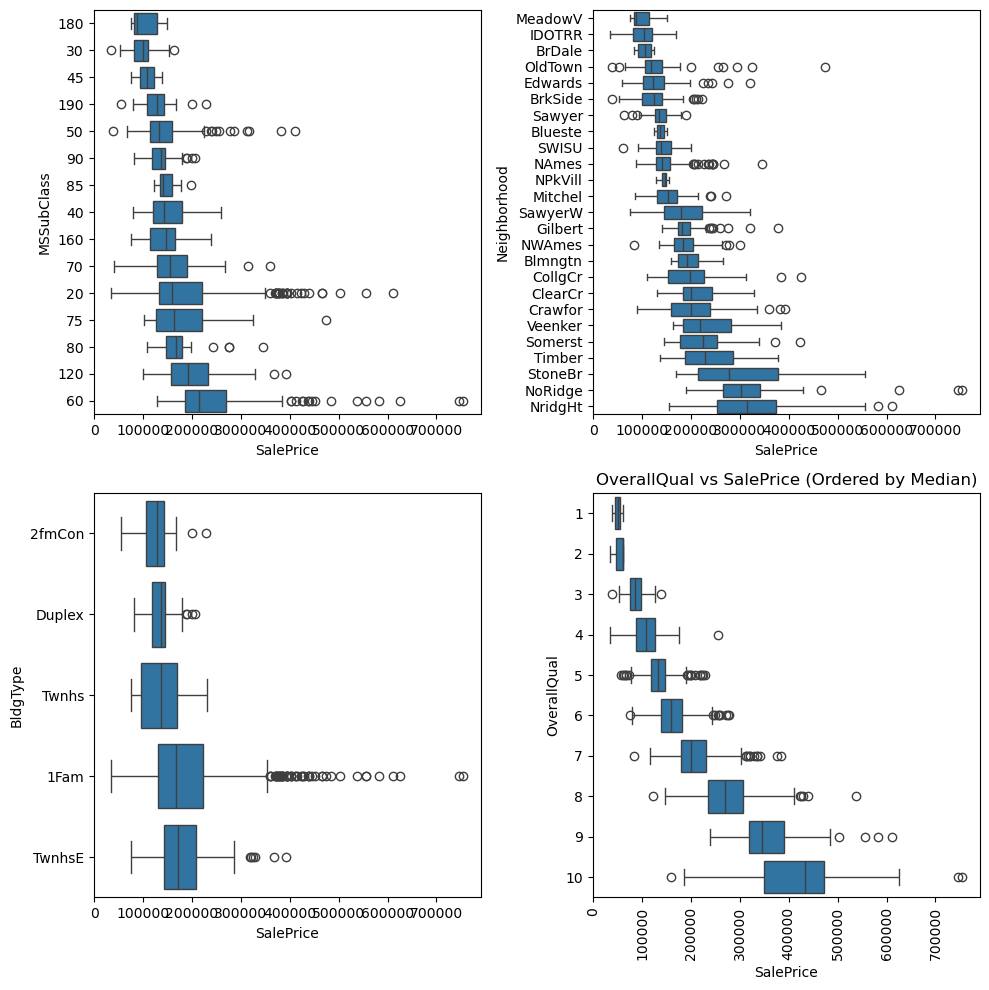

In [17]:
from math import ceil

fig, axes = plt.subplots(ceil(len(categorical_cols)/2), 2, figsize=(10,10))

for i, col_name in enumerate(categorical_cols):
    ordered_categories = categorical_data.groupby(col_name)['SalePrice'].median().sort_values().index
    
    ax = axes[i//2, i%2]

    sns.boxplot(x=categorical_data["SalePrice"], y=categorical_data[col_name].astype(str), order=ordered_categories, ax=ax)
    plt.title(f"{col_name} vs SalePrice (Ordered by Median)")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<font color="red">2b) I will choose overall quality and Neighbourhood when prdicting the SalePrice of the house</font>

Neighbourhood: Shows a more discernible pattern where certain neighborhoods have higher median SalePrices and others have lower median SalePrices, suggesting that the neighborhood could be a relevant predictor for SalePrice. 

OverallQual: There exists a strong and linear relationship, with SalePrice increasing as OverallQual increases, making it a potentially very relevant predictor for SalePrice.

In [18]:


# num_levels = {col: categorical_data[col].nunique() for col in categorical_cols}

# variable_most_levels = max(num_levels, key=num_levels.get)

# print("Number of levels for each variable:", num_levels)
# print("Variable with the highest number of levels:", variable_most_levels)


In [19]:
# import json

# level_most_houses = {col: [{"Level name": index, "Number of houses": count} \
#                            for index, count in categorical_data[col].value_counts(ascending=False).items()][0] \
#                            for col in categorical_cols}


# print(f"Highest number of houses for each variable: ", json.dumps(level_most_houses, indent = 4))

# Qn 3

In [20]:
garage_cols = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

garage_data = original_df.loc[:, [*garage_cols, "SalePrice"]]
garage_data

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice
0,Attchd,2003.0,RFn,2,548,TA,TA,208500
1,Attchd,1976.0,RFn,2,460,TA,TA,181500
2,Attchd,2001.0,RFn,2,608,TA,TA,223500
3,Detchd,1998.0,Unf,3,642,TA,TA,140000
4,Attchd,2000.0,RFn,3,836,TA,TA,250000
...,...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,TA,TA,175000
1456,Attchd,1978.0,Unf,2,500,TA,TA,210000
1457,Attchd,1941.0,RFn,1,252,TA,TA,266500
1458,Attchd,1950.0,Unf,1,240,TA,TA,142125


In [21]:
garage_data['GarageDecadeBlt'] = (garage_data['GarageYrBlt'].dropna() // 10 * 10).astype(int)
garage_data.drop(columns=["GarageYrBlt"])

garage_cols.remove('GarageYrBlt')
garage_cols.append('GarageDecadeBlt')

In [22]:
garage_data.loc[garage_data["GarageDecadeBlt"].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,GarageDecadeBlt
39,NaN,NaN,NaN,0,0,NaN,NaN,82000,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN,113000,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN,136500,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN,85000,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN,123600,NaN
...,...,...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN,122000,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN,112000,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN,92000,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN,136000,NaN


In [23]:
garage_data["GarageType"].value_counts(dropna=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [24]:
garage_data["GarageType"].fillna(value = "NoGarage", inplace=True)
garage_data["GarageType"].value_counts()

GarageType
Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [25]:
total_means = garage_data.groupby("GarageType").SalePrice.mean()
total_means

GarageType
2Types      151283.333333
Attchd      202892.656322
Basment     160570.684211
BuiltIn     254751.738636
CarPort     109962.111111
Detchd      134091.162791
NoGarage    103317.283951
Name: SalePrice, dtype: float64

In [26]:
garage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GarageType       1460 non-null   object 
 1   GarageYrBlt      1379 non-null   float64
 2   GarageFinish     1379 non-null   object 
 3   GarageCars       1460 non-null   int64  
 4   GarageArea       1460 non-null   int64  
 5   GarageQual       1379 non-null   object 
 6   GarageCond       1379 non-null   object 
 7   SalePrice        1460 non-null   int64  
 8   GarageDecadeBlt  1379 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 102.8+ KB


In [27]:
garage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GarageType       1460 non-null   object 
 1   GarageYrBlt      1379 non-null   float64
 2   GarageFinish     1379 non-null   object 
 3   GarageCars       1460 non-null   int64  
 4   GarageArea       1460 non-null   int64  
 5   GarageQual       1379 non-null   object 
 6   GarageCond       1379 non-null   object 
 7   SalePrice        1460 non-null   int64  
 8   GarageDecadeBlt  1379 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 102.8+ KB


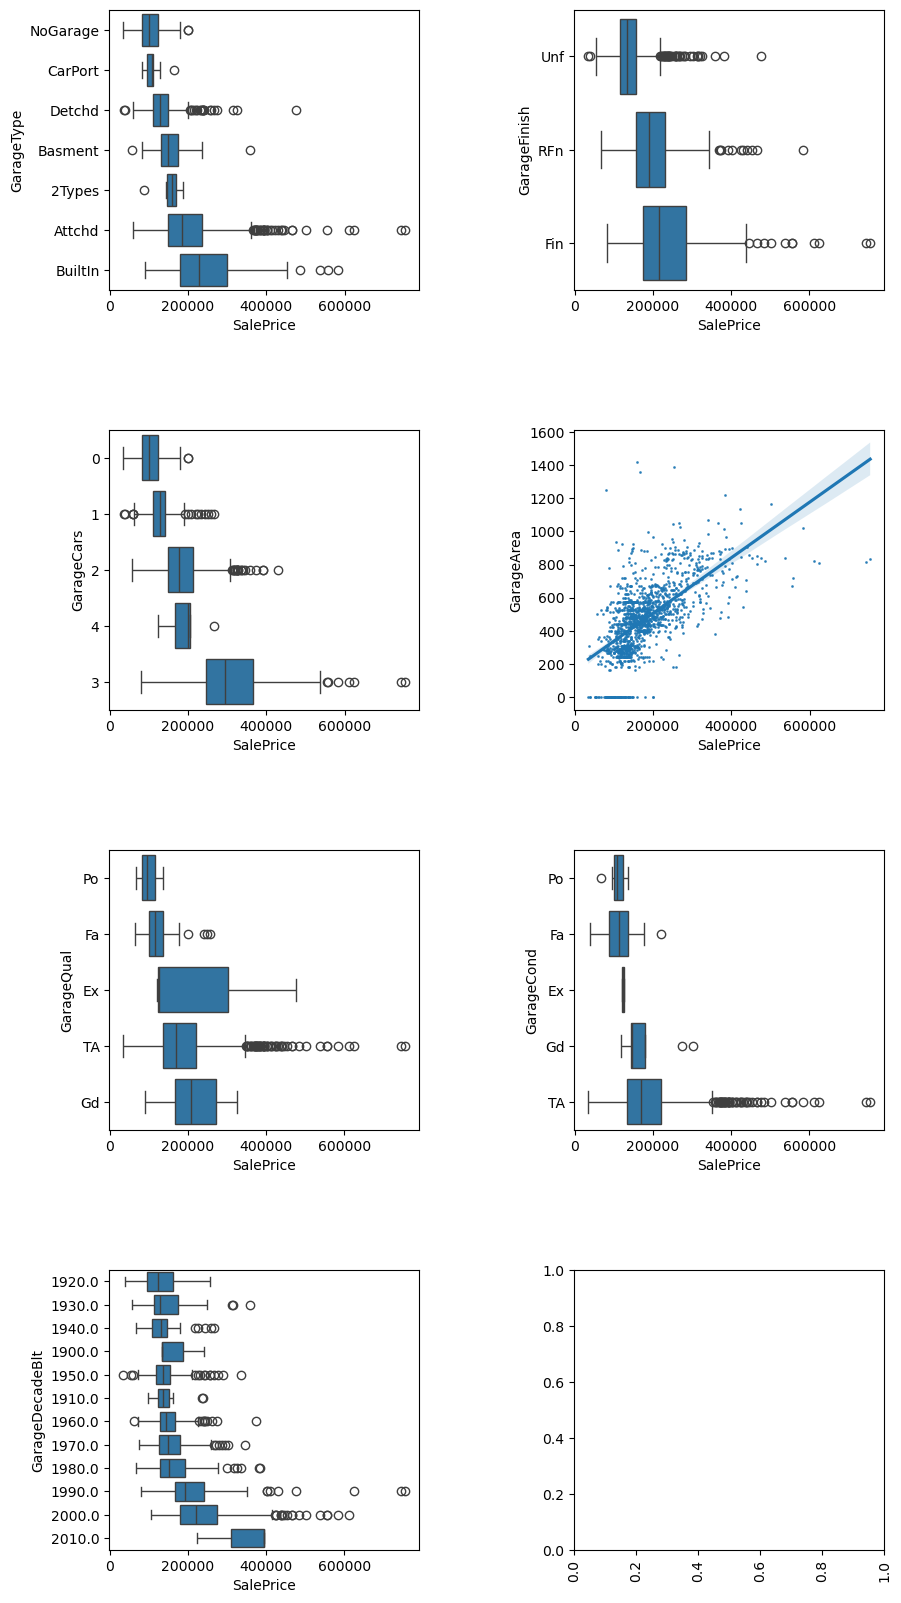

In [28]:
from math import ceil

fig, axes = plt.subplots(ceil(len(garage_cols)/2), 2, figsize=(10,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col_name in enumerate(garage_cols):
    ordered_categories = garage_data.groupby(col_name)['SalePrice'].median().sort_values().index
    
    ax = axes[i//2, i%2]

    if col_name != "GarageArea":
        sns.boxplot(x=garage_data["SalePrice"], y=garage_data[col_name].astype(str), order=ordered_categories, ax=ax)
        plt.xticks(rotation=90)
    else:
        sns.regplot(x=garage_data["SalePrice"], y=garage_data[col_name], ax=ax, scatter_kws={'s':1})
        plt.xticks(rotation=90)

plt.show()

<font color="red">3) The SalePrice is generally affected by whether it has a garage. It can be seen that the median SalePrice of houses with no garage is lower than houses with a garage.</font>

# END

In [29]:
garage_data.loc[garage_data.GarageType == "NoGarage", "GarageCond"] = "N/A"

In [30]:
garage_cond_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'N/A']
garage_data['GarageCond'] = pd.Categorical(garage_data['GarageCond'], categories=garage_cond_order, ordered=True)
total_means = garage_data.groupby(["GarageType", "GarageCond"]).SalePrice.mean().unstack()
total_means

/tmp/ipykernel_1771/1008191507.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_means = garage_data.groupby(["GarageType", "GarageCond"]).SalePrice.mean().unstack()


GarageCond,Po,Fa,TA,Gd,Ex,N/A
GarageType,,,,,,
2Types,NaN,87000.00000,164140.000000,NaN,NaN,NaN
Attchd,NaN,157500.00000,203057.771196,195552.857143,NaN,NaN
Basment,NaN,NaN,160570.684211,NaN,NaN,NaN
BuiltIn,NaN,NaN,254751.738636,NaN,NaN,NaN
CarPort,NaN,95000.00000,111832.375000,NaN,NaN,NaN
Detchd,108500.0,113415.83871,136577.939130,125250.000000,124000.0,NaN
NoGarage,NaN,NaN,NaN,NaN,NaN,103317.283951


<Axes: xlabel='GarageCond', ylabel='GarageType'>

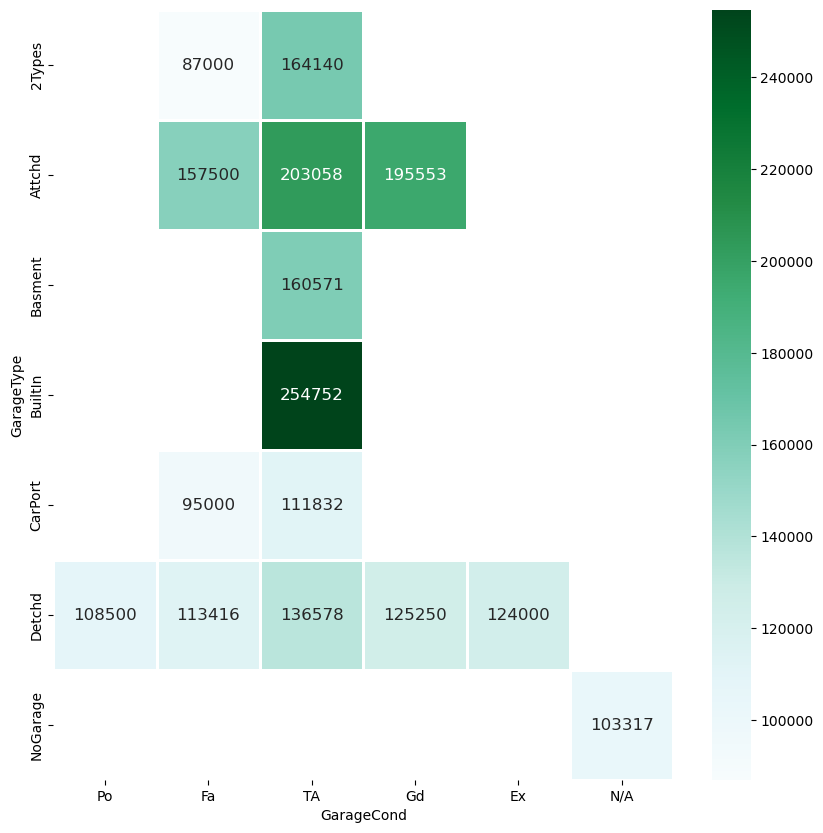

In [31]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(total_means, linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 12}, cmap = "BuGn")

<font color="red">Moreover, the condition of the garage generally increases the SalePrice as well. We can also note that houses with a CarPort or 2Types garage with a Fair grade are on average cheaper than houses with no garage.</font>